In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [27]:
df = pd.read_csv('../input/netflix-movies-and-tv-shows/Netflix_Movies_and_TV_Shows.csv')

In [28]:
df.shape

(3000, 7)

In [29]:
df.columns

Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country'],
      dtype='object')

In [30]:
df.dtypes

Title           object
Type            object
Genre           object
Release Year     int64
Rating          object
Duration        object
Country         object
dtype: object

In [31]:
df.describe

<bound method NDFrame.describe of            Title     Type     Genre  Release Year Rating   Duration  \
0        Title 1  TV Show    Comedy          1955     PG  3 Seasons   
1        Title 2  TV Show    Horror          2020      G  3 Seasons   
2        Title 3  TV Show    Action          1966  TV-PG    140 min   
3        Title 4    Movie  Thriller          2011  PG-13  3 Seasons   
4        Title 5  TV Show   Romance          1959  TV-14    172 min   
...          ...      ...       ...           ...    ...        ...   
2995  Title 2996    Movie  Thriller          2007  TV-PG     75 min   
2996  Title 2997    Movie     Drama          2019      G  2 Seasons   
2997  Title 2998  TV Show    Action          1993      R  3 Seasons   
2998  Title 2999    Movie     Drama          1966  PG-13  1 Seasons   
2999  Title 3000  TV Show  Thriller          2015     PG  2 Seasons   

            Country  
0             Japan  
1             India  
2     United States  
3            Canada  
4  

In [32]:
missing_values = df.isnull().sum()
print("Пропуски в данных:\n", missing_values)

Пропуски в данных:
 Title           0
Type            0
Genre           0
Release Year    0
Rating          0
Duration        0
Country         0
dtype: int64


In [33]:
duplicate_rows = df[df.duplicated()]
print(f"Количество дубликатов: {len(duplicate_rows)}")

Количество дубликатов: 0


In [34]:
df.head(20)

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India
5,Title 6,Movie,Action,2007,PG-13,3 Seasons,Japan
6,Title 7,Movie,Romance,1977,TV-14,68 min,United States
7,Title 8,Movie,Comedy,1971,TV-PG,104 min,Japan
8,Title 9,Movie,Drama,2000,PG-13,2 Seasons,Canada
9,Title 10,Movie,Thriller,1975,TV-MA,1 Seasons,India


In [35]:
df.drop(['Title'], axis=1)

,Type,Genre,Release Year,Rating,Duration,Country
0,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,TV Show,Horror,2020,G,3 Seasons,India
2,TV Show,Action,1966,TV-PG,140 min,United States
3,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,TV Show,Romance,1959,TV-14,172 min,India
...,...,...,...,...,...,...
2995,Movie,Thriller,2007,TV-PG,75 min,Germany
2996,Movie,Drama,2019,G,2 Seasons,Germany
2997,TV Show,Action,1993,R,3 Seasons,Canada
2998,Movie,Drama,1966,PG-13,1 Seasons,Germany


In [36]:
df['Genre'].value_counts()

Genre
Horror         398
Thriller       398
Drama          378
Romance        376
Comedy         369
Documentary    369
Action         367
Sci-Fi         345
Name: count, dtype: int64

Text(0, 0.5, 'Count')

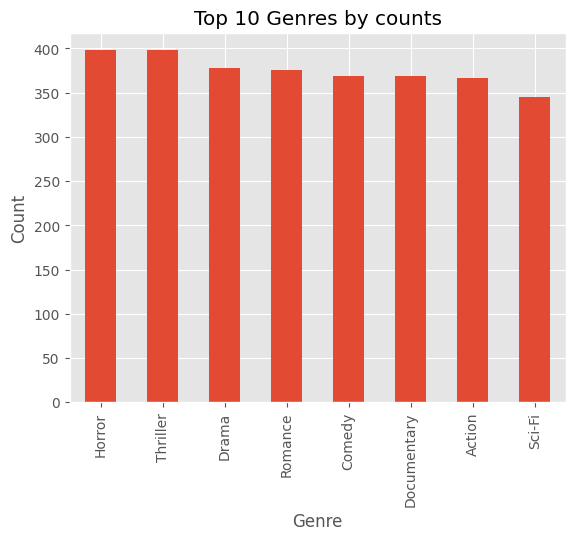

In [37]:
ax = df['Genre'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Genres by counts')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')

In [38]:
df['Rating'].value_counts()

Rating
TV-14    441
R        441
PG       434
TV-PG    430
PG-13    422
TV-MA    418
G        414
Name: count, dtype: int64

In [39]:
df.query('Rating == "PG-13"') \
    .sort_values('Rating')

,Title,Type,Genre,Release Year,Rating,Duration,Country
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
2051,Title 2052,TV Show,Romance,2015,PG-13,68 min,United Kingdom
2047,Title 2048,Movie,Documentary,1972,PG-13,141 min,United Kingdom
2042,Title 2043,Movie,Sci-Fi,2007,PG-13,62 min,Germany
2023,Title 2024,TV Show,Sci-Fi,1972,PG-13,137 min,South Korea
...,...,...,...,...,...,...,...
950,Title 951,TV Show,Romance,1986,PG-13,1 Seasons,India
943,Title 944,TV Show,Drama,1962,PG-13,169 min,Australia
922,Title 923,Movie,Documentary,1964,PG-13,91 min,Australia
1126,Title 1127,Movie,Horror,2010,PG-13,163 min,South Korea


In [40]:
df['Type'].value_counts()

Type
TV Show    1527
Movie      1473
Name: count, dtype: int64

In [41]:
df['Duration'].value_counts()

Duration
3 Seasons    494
1 Seasons    492
2 Seasons    490
97 min        23
173 min       21
            ... 
110 min        7
133 min        6
96 min         5
149 min        4
142 min        3
Name: count, Length: 124, dtype: int64

In [42]:
df['Country'].value_counts()

Country
Canada            421
United Kingdom    392
South Korea       376
Germany           373
Australia         371
United States     369
Japan             349
India             349
Name: count, dtype: int64

Text(0, 0.5, 'Count')

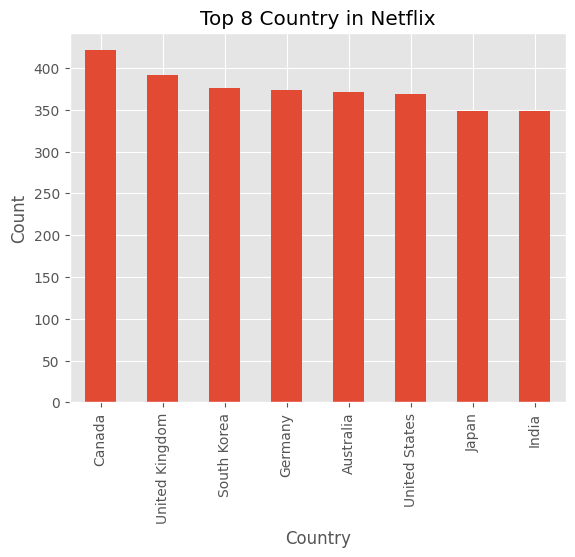

In [45]:
ax = df['Country'].value_counts() \
    .head(8) \
    .plot(kind='bar', title='Top 8 Country in Netflix')
ax.set_xlabel('Country')
ax.set_ylabel('Count')